In [5]:
import time
import csv2md
import torch as t
import numpy as np
import matplotlib.pyplot as plt
import open3d
from numpy import linalg as LA
import os
import h5py
import pandas as pd
from torch import nn
import math

In [202]:
def namelist(path, fltr):
    cip = []
    for root, structure, files in os.walk(path):
        for file in files:
            if fltr in file:
                cip.append(os.path.join(root, file))
    return cip
def pose6tomat(a):
    return(np.array(
            [[a[0], a[1], a[2]],
            [a[1], a[3], a[4]],
            [a[2], a[4], a[5]]]))

In [8]:
time.ctime()

'Fri Jan 14 16:03:41 2022'

In [5]:
time.today()

AttributeError: module 'time' has no attribute 'today'

In [10]:
14-18+1+31

28

In [40]:
csv2md "C:/cherepashkin1/598test/plot_output/e066/046l/opt.csv"

SyntaxError: invalid syntax (<ipython-input-40-c18e9656d238>, line 1)

In [15]:
with open('C:/cherepashkin1/598test/plot_output/e066/046l/sys_argv.txt', 'r') as f:
    lst = f.readlines()

In [25]:
lst[0]

"['C:/circles/finetune_test/main.py', '-epoch', '10', '-bs', '7', '-num_input_images', '1', '-framelim', '25', '-rescale', '500', '-cencrop', '700', '-outputt', 'pose6', '-criterion', 'L2', '-localexp', '', '-lr', '1e-5', '-expnum', 'e066', '-hidden_dim', '6', '-inputt', 'img', '-lb', 'pose6', '-zero_angle', '-gttype', 'single_f_n', '-csvname', '598csv9', '-parallel', 'torch', '-machine', 'lenovo', '-wandb', '', '-merging_order', 'color_channel', '-updateFraction', '0.2', '-steplr', '20', '0.2', '-batch_output', '2', '-cmscrop', '0', '-weight_decay', '0', '-print_minibatch', '1']\n"

In [32]:
lst0 = [st for st in lst[0].split(',')]

In [41]:
str(lst0[0])

"['C:/circles/finetune_test/main.py'"

In [46]:
lst0[1]

" '-epoch'"

In [ ]:
lst0

In [ ]:
for j, st in enumerate(lst[0].split(',')):
    print(st)
#     print(st + '|' + )

In [47]:
lst2 = ['C:/circles/finetune_test/main.py', '-epoch', '10', '-bs', '7', '-num_input_images', '1', '-framelim', '25', '-rescale', '500', '-cencrop', '700', '-outputt', 'pose6', '-criterion', 'L2', '-localexp', '', '-lr', '1e-5', '-expnum', 'e066', '-hidden_dim', '6', '-inputt', 'img', '-lb', 'pose6', '-zero_angle', '-gttype', 'single_f_n', '-csvname', '598csv9', '-parallel', 'torch', '-machine', 'lenovo', '-wandb', '', '-merging_order', 'color_channel', '-updateFraction', '0.2', '-steplr', '20', '0.2', '-batch_output', '2', '-cmscrop', '0', '-weight_decay', '0', '-print_minibatch', '1']


In [48]:
print(lst2[0])

C:/circles/finetune_test/main.py


In [ ]:
for j in range(1,30):
    print(lst2[2*j-1].replace('-','')+'|'+lst2[2*j])

In [ ]:
for j in range(1,15):
    print(lst2[2*j-1].replace('-','')+'|'+lst2[2*j])
print(lst2[2*15-1])
for j in range(15,20):
    print(lst2[2*j].replace('-','')+'|'+lst2[2*j+1])

In [ ]:
lst2

In [ ]:
(len(lst2)-1)//2

In [ ]:
for root, structure, files in os.walk('C:/cherepashkin1/598test/plot_output/e066/'):
    for file in files:
        if 
        print(os.path.join(root,file))
    

In [5]:
def moments(image):
    X = image[:, 0]
    Y = image[:, 1]
    Z = image[:, 2]
    car = np.array([np.matmul(X, X.T), np.matmul(X, Y.T), np.matmul(X, Z.T),
            np.matmul(Y, Y.T), np.matmul(Y, Z.T), np.matmul(Z, Z.T)])
    return(car)

In [4]:
image = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484717/1491988_Surface.ply').points)


In [10]:
np.mean(image, axis=0)

array([129.83198685,  43.93653293, 154.31712995])

In [6]:
moments(image)

array([5.04089976e+08, 1.64563652e+08, 5.75078730e+08, 6.47246460e+07,
       2.00929929e+08, 7.24817978e+08])

In [11]:
moments(image-np.mean(image, axis=0))

array([ 11682431.39148296,  -2072327.49637135, -10192441.5262221 ,
         8333248.33205532,   2867904.95892099,  29169936.10817471])

In [3]:
image.shape

(29212, 3)

In [12]:
if opt.criterion == 'L2':
    loss_fn = nn.MSELoss(reduction='none')
elif opt.criterion == 'L1':
    loss_fn = nn.L1Loss(reduction='none')

NameError: name 'opt' is not defined

In [14]:
loss_fn = nn.MSELoss(reduction='none')

In [20]:
otp = t.Tensor([1, 2, 3, -1, -2, -3])

In [21]:
loss_fn(otp, t.zeros(6))

tensor([1., 4., 9., 1., 4., 9.])

In [23]:
t.mean(loss_fn(otp, t.zeros(6)))

tensor(4.6667)

# calculating eigenmatrix from subtracted mean pcd

In [39]:
cip = namelist('C:/cherepashkin1/phenoseed/598','Surface.ply')
car2 = np.zeros([len(cip), 3, 3])
car = np.zeros(6)
for i,k in enumerate(cip):
    pcd = np.asarray(open3d.io.read_point_cloud(k).points)
    pcd = pcd - np.mean(pcd,axis=0)
    # image = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484717/1491988_Surface.ply').points)
    X = pcd[:, 0]
    Y = pcd[:, 1]
    Z = pcd[:, 2]
    car = np.array([np.matmul(X, X.T), np.matmul(X, Y.T), np.matmul(X, Z.T),
            np.matmul(Y, Y.T), np.matmul(Y, Z.T), np.matmul(Z, Z.T)])
    _, car2[i,:,:] = LA.eig(pose6tomat(car))
# for i in range(len(cip)):
    

In [30]:
car.shape

(5283, 6)

In [31]:
car2 = np.zeros([len(cip), 3, 3])

In [33]:
for i in range(len(cip)):
    car2[i,:,:] = pose6tomat(car[i,:])

In [35]:
car3 = np.zeros([len(cip), 3, 3])

In [36]:
for i in range(len(cip)):
    _, car3[i,:,:] = LA.eig(car2[i,:,:])

In [37]:
car3[0]

array([[ 0.62223975,  0.7771141 ,  0.09440003],
       [ 0.2129065 , -0.05195336, -0.97569036],
       [ 0.75331834, -0.6272117 ,  0.19778009]])

In [40]:
df = pd.read_csv('C:/circles/finetune_test/csv/598frame.csv')

In [41]:
df

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,moment1,moment2,moment3,moment4,moment5,mom0,mom1,mom2,mom3,mom4,mom5
0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000,504089976.0,164563652.0,575078730.0,64724646.0,200929929.0,724817978.0,1.168243e+07,-2.072327e+06,-1.019244e+07,8.333248e+06,2.867905e+06,2.916994e+07
1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000,428386811.0,167247653.0,479568284.0,74638238.0,199349082.0,609253694.0,1.177674e+07,-1.249855e+06,-1.077973e+07,6.489597e+06,1.028339e+06,3.211648e+07
2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619,363275825.0,136293591.0,446703489.0,56699590.0,176090923.0,592715504.0,6.813210e+06,-2.724059e+05,-4.222803e+06,4.379176e+06,3.334522e+06,2.229237e+07
3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619,381880431.0,128225058.0,412001326.0,50659849.0,151043672.0,500506132.0,1.155030e+07,-1.867066e+06,-8.683638e+06,4.960190e+06,3.262556e+06,2.261945e+07
4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826,395257806.0,165420434.0,442680482.0,80723765.0,199558581.0,543286441.0,7.429177e+06,-2.230910e+06,-4.458354e+06,8.251103e+06,6.268502e+06,2.776715e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619,435057172.0,86812440.0,460315264.0,23001555.0,91717537.0,515400941.0,8.852938e+06,-1.746448e+05,1.059811e+07,5.247736e+06,-6.846828e+04,4.087370e+07
5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619,521235084.0,171184215.0,419739092.0,64739111.0,145262026.0,378174238.0,2.024213e+07,-2.895143e+05,-8.249394e+06,6.049184e+06,-1.224629e+06,1.255204e+07
5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619,620853856.0,102768458.0,568026943.0,23532224.0,101179273.0,588455777.0,2.424024e+07,-6.115976e+05,-1.484443e+07,5.618728e+06,1.804479e+05,1.901012e+07
5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619,661442177.0,249010683.0,530651160.0,110415531.0,211167589.0,500456320.0,3.305156e+07,1.676018e+06,-1.634760e+07,1.306456e+07,-4.131224e+06,2.430720e+07


In [42]:
print(len(df.columns))

20


In [43]:
car2.shape

(5283, 3, 3)

In [44]:
car3 = car2.reshape([len(cip),-1])

In [45]:
car3.shape

(5283, 9)

In [47]:
car2[0]

array([[ 0.41700143, -0.82275715,  0.38623888],
       [-0.13249349, -0.47543578, -0.86971621],
       [-0.89919702, -0.31149877,  0.30726737]])

In [46]:
car3[0]

array([ 0.41700143, -0.82275715,  0.38623888, -0.13249349, -0.47543578,
       -0.86971621, -0.89919702, -0.31149877,  0.30726737])

In [49]:
for i in range(9):
    df.insert(20+i, "ornt"+str(i), car3[:,i])

In [50]:
df

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,moment1,...,mom5,ornt0,ornt1,ornt2,ornt3,ornt4,ornt5,ornt6,ornt7,ornt8
0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000,504089976.0,164563652.0,...,2.916994e+07,0.417001,-0.822757,0.386239,-0.132493,-0.475436,-0.869716,-0.899197,-0.311499,0.307267
1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000,428386811.0,167247653.0,...,3.211648e+07,-0.396725,0.766132,-0.505620,0.047406,-0.532986,-0.844795,0.916712,0.359121,-0.175130
2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619,363275825.0,136293591.0,...,2.229237e+07,0.238723,-0.947801,0.211387,-0.166528,-0.254412,-0.952650,-0.956703,-0.192217,0.218569
3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619,381880431.0,128225058.0,...,2.261945e+07,0.475076,-0.874071,-0.101501,-0.161030,0.027042,-0.986579,-0.865085,-0.485045,0.127905
4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826,395257806.0,165420434.0,...,2.776715e+07,-0.207030,0.696365,0.687178,0.282786,0.715009,-0.639371,0.936574,-0.061955,0.344950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619,435057172.0,86812440.0,...,4.087370e+07,0.288228,-0.912054,0.291687,-0.002986,0.303757,0.952745,0.957557,0.275479,-0.084828
5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619,521235084.0,171184215.0,...,1.255204e+07,-0.842404,0.470543,-0.262574,-0.021352,-0.516056,-0.856289,0.538423,0.715735,-0.444775
5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619,620853856.0,102768458.0,...,1.901012e+07,0.765961,-0.619616,-0.171406,-0.018797,0.244920,-0.969361,-0.642613,-0.745714,-0.175952
5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619,661442177.0,249010683.0,...,2.430720e+07,-0.783147,-0.462793,0.415335,-0.116293,0.765135,0.633281,0.610865,-0.447652,0.653033


# Rotation matrix to Euler angles

In [55]:
# Calculates Rotation Matrix given euler angles.
def eulerAnglesToRotationMatrix(theta) :

    R_x = np.array([[1,         0,                  0                   ],
                    [0,         math.cos(theta[0]), -math.sin(theta[0]) ],
                    [0,         math.sin(theta[0]), math.cos(theta[0])  ]
                    ])

    R_y = np.array([[math.cos(theta[1]),    0,      math.sin(theta[1])  ],
                    [0,                     1,      0                   ],
                    [-math.sin(theta[1]),   0,      math.cos(theta[1])  ]
                    ])

    R_z = np.array([[math.cos(theta[2]),    -math.sin(theta[2]),    0],
                    [math.sin(theta[2]),    math.cos(theta[2]),     0],
                    [0,                     0,                      1]
                    ])

    R = np.dot(R_z, np.dot( R_y, R_x ))

    return R

In [51]:
# Checks if a matrix is a valid rotation matrix.
def isRotationMatrix(R) :
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype = R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6

# Calculates rotation matrix to euler angles
# The result is the same as MATLAB except the order
# of the euler angles ( x and z are swapped ).
def rotationMatrixToEulerAngles(R) :

    assert(isRotationMatrix(R))

    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])

    singular = sy < 1e-6

    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0

    return np.array([x, y, z])

In [57]:
car2[0]

array([[ 0.41700143, -0.82275715,  0.38623888],
       [-0.13249349, -0.47543578, -0.86971621],
       [-0.89919702, -0.31149877,  0.30726737]])

In [56]:
eulerAnglesToRotationMatrix(rotationMatrixToEulerAngles(car2[0]))

array([[ 0.41700143, -0.397455  ,  0.8173979 ],
       [-0.13249349,  0.86313269,  0.48728579],
       [-0.89919702, -0.31149877,  0.30726737]])

In [59]:
def rot2eul(R):
    beta = -np.arcsin(R[2,0])
    alpha = np.arctan2(R[2,1]/np.cos(beta),R[2,2]/np.cos(beta))
    gamma = np.arctan2(R[1,0]/np.cos(beta),R[0,0]/np.cos(beta))
    return np.array((alpha, beta, gamma))

def eul2rot(theta) :

    R = np.array([[np.cos(theta[1])*np.cos(theta[2]),       np.sin(theta[0])*np.sin(theta[1])*np.cos(theta[2]) - np.sin(theta[2])*np.cos(theta[0]),      np.sin(theta[1])*np.cos(theta[0])*np.cos(theta[2]) + np.sin(theta[0])*np.sin(theta[2])],
                  [np.sin(theta[2])*np.cos(theta[1]),       np.sin(theta[0])*np.sin(theta[1])*np.sin(theta[2]) + np.cos(theta[0])*np.cos(theta[2]),      np.sin(theta[1])*np.sin(theta[2])*np.cos(theta[0]) - np.sin(theta[0])*np.cos(theta[2])],
                  [-np.sin(theta[1]),                        np.sin(theta[0])*np.cos(theta[1]),                                                           np.cos(theta[0])*np.cos(theta[1])]])

    return R

In [67]:
rotationMatrixToEulerAngles(car2[0])

array([-0.79223651,  1.11793084, -0.30764163])

In [60]:
rot2eul(car2[0])

array([-0.79223651,  1.11793084, -0.30764163])

In [68]:
eul2rot(rot2eul(-car2[0]))

array([[-0.41700143,  0.82275715, -0.38623888],
       [ 0.13249349,  0.47543578,  0.86971621],
       [ 0.89919702,  0.31149877, -0.30726737]])

In [63]:
car2[0]

array([[ 0.41700143, -0.82275715,  0.38623888],
       [-0.13249349, -0.47543578, -0.86971621],
       [-0.89919702, -0.31149877,  0.30726737]])

In [ ]:
R = np.array([[ 0.9982552 , -0.03323557, -0.04880523],
       [-0.03675031,  0.29723396, -0.95409716],
       [-0.04621654, -0.95422606, -0.29549393]])

ang = rot2eul(R)
eul2rot(ang)

import transforms3d.euler as eul
ang = eul.mat2euler(R, axes='sxyz')
eul.euler2mat(ang[0], ang[1], ang[2], axes='sxyz')

In [65]:
LA.det(-car2[0])

1.0

In [133]:
np.set_printoptions(edgeitems=3, infstr='inf',
linewidth=75, nanstr='nan', precision=8,
suppress=False, threshold=1000, formatter=None)

In [134]:
car2[0]

array([[ 0.41700143, -0.82275715,  0.38623888],
       [-0.13249349, -0.47543578, -0.86971621],
       [-0.89919702, -0.31149877,  0.30726737]])

In [126]:
pcd0 = np.asarray(open3d.io.read_point_cloud(cip[0]).points)

In [127]:
pcd1= pcd0-np.mean(pcd0,axis=0)

In [128]:
pcd2 = np.matmul(car2[0],pcd1.T).T

In [129]:
pcd3 = np.matmul(pcd1, car2[0])

In [130]:
pcd4 = np.matmul(car2[0].T,pcd1.T).T

In [ ]:
LA.eig(pcd2)

In [70]:
def viewpoints(pcd, lims = None):
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
              'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    for i, p in enumerate(pcd):
        if p.shape[0] < p.shape[1]:
            p = p.T
        ax.scatter(p[:,0], p[:,1], p[:,2], c=colors[i], s=5)
    if lims is not None:
        ax.set_xlim(lims[0], lims[1])
        ax.set_ylim(lims[0], lims[1])
        ax.set_zlim(lims[0], lims[1])
    return fig, ax

In [79]:
pcd2.shape

(3, 29212)

(<Figure size 720x720 with 1 Axes>, <Axes3DSubplot:>)

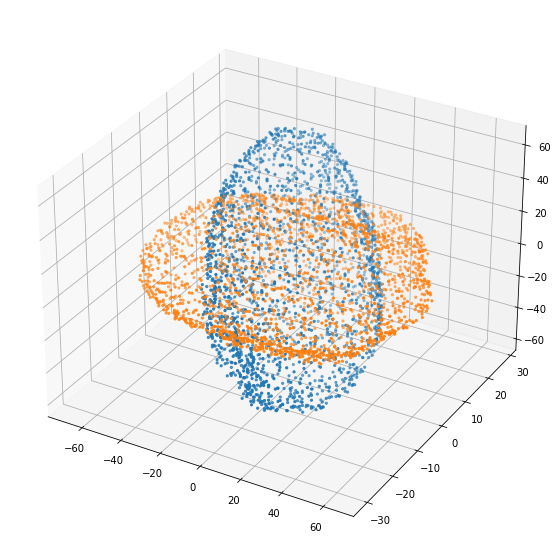

In [131]:
viewpoints([pcd1[::15,:], pcd3[::15,:]])

In [86]:
LA.eig(pose6tomat(moments(pcd2)))

(array([34319243.07194853,  8240344.2733387 ,  6626028.48642577]),
 array([[ 0.06440468, -0.99530601, -0.07223566],
        [-0.7897884 , -0.09508466,  0.60596468],
        [ 0.60998879, -0.01802392,  0.79220503]]))

In [87]:
LA.eig(pose6tomat(moments(pcd3)))

(array([34319243.07194853,  8240344.2733387 ,  6626028.48642577]),
 array([[ 1.00000000e+00,  1.65166748e-16, -2.10187448e-17],
        [ 0.00000000e+00, -1.32238278e-14,  1.00000000e+00],
        [ 0.00000000e+00,  1.00000000e+00,  1.43229558e-14]]))

In [91]:
_, v = LA.eig(pose6tomat(moments(pcd3)))

In [92]:
LA.det(v)

-1.0

In [96]:
cip[0]

'C:/cherepashkin1/phenoseed/598\\1484717\\1491988_Surface.ply'

In [95]:
car2[0]

array([[ 0.41700143, -0.82275715,  0.38623888],
       [-0.13249349, -0.47543578, -0.86971621],
       [-0.89919702, -0.31149877,  0.30726737]])

In [157]:
for i in range(1):
    pcd0 = np.asarray(open3d.io.read_point_cloud(cip[i]).points)
    pcd1= pcd0-np.mean(pcd0,axis=0)
    w, v = LA.eig(pose6tomat(moments(pcd1))) 
    print(w)
    print(v)
    print(np.argsort(w))
    print('v', v[np.argsort(w)])
#     print()
    v0 = v[np.argsort(w)]
    pcd3 = np.matmul(pcd1, v0)

    w1, v1 = LA.eig(pose6tomat(moments(pcd3)))
    print('v1', v1)
#     pcd4 = np.matmul(pcd3, v1)
#     w2, v2 = LA.eig(pose6tomat(moments(pcd4)))  
#     pcd5 = np.matmul(pcd4, v2)
#     w3, v3 = LA.eig(pose6tomat(moments(pcd5)))        
#     with np.printoptions(precision=0, suppress=True):
#         print(w,'\n',v)
#         print(np.array(pose6tomat(moments(pcd3))))        
#         print(LA.det(v))

#         print('v1', v1)
#         print(LA.det(v1))
#         print('v3')
#         print(v3)
#         print(LA.det(v3))

[34319243.0719485   6626028.48642578  8240344.27333869]
[[ 0.41700143 -0.82275715  0.38623888]
 [-0.13249349 -0.47543578 -0.86971621]
 [-0.89919702 -0.31149877  0.30726737]]
[1 2 0]
v [[-0.13249349 -0.47543578 -0.86971621]
 [-0.89919702 -0.31149877  0.30726737]
 [ 0.41700143 -0.82275715  0.38623888]]
v1 [[-0.31107867  0.85900302  0.40662497]
 [ 0.58283494 -0.16552267  0.79555369]
 [-0.75068868 -0.48447502  0.4491664 ]]


In [99]:
# cip = namelist('C:/cherepashkin1/phenoseed/598','Surface.ply')
# car2 = np.zeros([len(cip), 3, 3])
car = np.zeros(6)
for i in range(1):
# for i in range(len(cip)):
    pcd = np.asarray(open3d.io.read_point_cloud(cip[i]).points)
    pcd = pcd - np.mean(pcd,axis=0)
    # image = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484717/1491988_Surface.ply').points)
    X = pcd[:, 0]
    Y = pcd[:, 1]
    Z = pcd[:, 2]
    car = np.array([np.matmul(X, X.T), np.matmul(X, Y.T), np.matmul(X, Z.T),
            np.matmul(Y, Y.T), np.matmul(Y, Z.T), np.matmul(Z, Z.T)])
#     with 
#     print(np.array(pose6tomat(car)))
    _, car2[i,:,:] = LA.eig(pose6tomat(car))
# for i in range(len(cip)):
    

[[ 11682431.39148296  -2072327.49637135 -10192441.5262221 ]
 [ -2072327.49637135   8333248.33205532   2867904.95892099]
 [-10192441.5262221    2867904.95892099  29169936.10817471]]


In [103]:
11682431-1e7

1682431.0

In [104]:
LA.eig(np.array(pose6tomat(car)))

(array([34319243.0719485 ,  6626028.48642578,  8240344.27333869]),
 array([[ 0.41700143, -0.82275715,  0.38623888],
        [-0.13249349, -0.47543578, -0.86971621],
        [-0.89919702, -0.31149877,  0.30726737]]))

In [110]:
v, w = LA.eig(np.array(pose6tomat(car)))

In [112]:
LA.det(w)

-1.0

In [108]:
from scipy import linalg

In [109]:
linalg.eig(np.array(pose6tomat(car)))

(array([34319243.0719485 +0.j,  6626028.48642578+0.j,
         8240344.27333869+0.j]),
 array([[ 0.41700143, -0.82275715,  0.38623888],
        [-0.13249349, -0.47543578, -0.86971621],
        [-0.89919702, -0.31149877,  0.30726737]]))

In [162]:
for i in range(1):
    pcd0 = np.asarray(open3d.io.read_point_cloud(cip[i]).points)
    pcd1= pcd0-np.mean(pcd0,axis=0)
    w1, v1 = LA.eig(pose6tomat(moments(pcd1))) 
    pcd2 = np.matmul(pcd1, v1)
    w2, v2 = LA.eig(pose6tomat(moments(pcd2)))
    with np.printoptions(precision=0, suppress=True):
        print(v2)
    pcd3 = np.matmul(pcd2, v2)
#     w3, v3 = LA.eig(pose6tomat(moments(pcd3)))
    with np.printoptions(precision=0, suppress=True):
        print(np.array(pose6tomat(moments(pcd3))))

#     print(w)
#     print(v)
#     print(np.argsort(w))
#     print('v', v[np.argsort(w)])
#     print()
#     v0 = v[np.argsort(w)]

#     w1, v1 = LA.eig(pose6tomat(moments(pcd3)))
#     print('v1', v1)
#     pcd4 = np.matmul(pcd3, v1)
#     w2, v2 = LA.eig(pose6tomat(moments(pcd4)))  
#     pcd5 = np.matmul(pcd4, v2)
#     w3, v3 = LA.eig(pose6tomat(moments(pcd5)))        
#     with np.printoptions(precision=0, suppress=True):
#         print(w,'\n',v)
#         print(np.array(pose6tomat(moments(pcd3))))        
#         print(LA.det(v))

#         print('v1', v1)
#         print(LA.det(v1))
#         print('v3')
#         print(v3)
#         print(LA.det(v3))

[[ 1.  0. -0.]
 [ 0. -0.  1.]
 [ 0.  1.  0.]]
[[34319243.        0.       -0.]
 [       0.  8240344.        0.]
 [      -0.        0.  6626028.]]


In [168]:
np.sum(v-np.eye(3))

0.0

In [169]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [167]:
v

array([[ 1.00000000e+00,  8.40749791e-18,  8.92793233e-18],
       [ 0.00000000e+00,  7.35736558e-16,  1.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00, -8.55849540e-16]])

In [170]:
v-np.eye(3)

array([[ 0.00000000e+00,  8.40749791e-18,  8.92793233e-18],
       [ 0.00000000e+00, -1.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00, -1.00000000e+00]])

In [186]:
v = np.ones(3)

In [187]:
#for i in range(1):
pcd0 = np.asarray(open3d.io.read_point_cloud(cip[0]).points)
pcd= pcd0-np.mean(pcd0,axis=0)
# i = 0
# while np.sum(np.abs(v-np.eye(3)))!=0:
matv = np.eye(3)
while np.sum(np.abs(v-np.eye(3))) > 1e-14:
    w, v = LA.eig(pose6tomat(moments(pcd)))
    with np.printoptions(precision=0, suppress=True):
        print('v', v)
    pcd = np.matmul(pcd, v)
    matv = np.matmul(matv, v)
print(v)
print(w)
print('matv', matv)
#     if np.sum(np.abs(v-np.eye(3))) < 1e-14:
#         break
print(np.sum(np.abs(v-np.eye(3))))
#     w2, v2 = LA.eig(pose6tomat(moments(pcd2)))
#     with np.printoptions(precision=0, suppress=True):
#         print(v2)
#     pcd3 = np.matmul(pcd2, v2)
# #     w3, v3 = LA.eig(pose6tomat(moments(pcd3)))
#     with np.printoptions(precision=0, suppress=True):
#         print(np.array(pose6tomat(moments(pcd3))))

#     print(w)
#     print(v)
#     print(np.argsort(w))
#     print('v', v[np.argsort(w)])
#     print()
#     v0 = v[np.argsort(w)]

#     w1, v1 = LA.eig(pose6tomat(moments(pcd3)))
#     print('v1', v1)
#     pcd4 = np.matmul(pcd3, v1)
#     w2, v2 = LA.eig(pose6tomat(moments(pcd4)))  
#     pcd5 = np.matmul(pcd4, v2)
#     w3, v3 = LA.eig(pose6tomat(moments(pcd5)))        
#     with np.printoptions(precision=0, suppress=True):
#         print(w,'\n',v)
#         print(np.array(pose6tomat(moments(pcd3))))        
#         print(LA.det(v))

#         print('v1', v1)
#         print(LA.det(v1))
#         print('v3')
#         print(v3)
#         print(LA.det(v3))

v [[ 0. -1.  0.]
 [-0. -0. -1.]
 [-1. -0.  0.]]
v [[ 1.  0. -0.]
 [ 0. -0.  1.]
 [ 0.  1.  0.]]
v [[ 1.  0.  0.]
 [ 0. -1. -0.]
 [ 0. -0.  1.]]
v [[ 1.  0. -0.]
 [ 0. -1. -0.]
 [ 0. -0.  1.]]
v [[ 1. -0. -0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 1.00000000e+00 -1.78558647e-17 -8.79136718e-33]
 [ 0.00000000e+00  1.00000000e+00  5.22828984e-16]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[34319243.07194854  8240344.2733387   6626028.48642577]
matv [[ 0.41700143  0.38623888 -0.82275715]
 [-0.13249349 -0.86971621 -0.47543578]
 [-0.89919702  0.30726737 -0.31149877]]
5.406848489764662e-16


In [ ]:
# for i in range(3):
#     print(np.matmul((pose6tomat(moments(pcd))-w[i]*np.eye(3)),v[:,i]))

In [207]:
pcd0 = np.asarray(open3d.io.read_point_cloud(cip[0]).points)
pcd1= pcd0-np.mean(pcd0,axis=0)
M1 = pose6tomat(moments(pcd1))
print(M1)
w1, v1 = LA.eig(M1)
print(w1, '\n', v1)
# print(np.array(pose6tomat(moments(pcd))))

# print(2-np.argsort(w))

# pcd2 = np.matmul(pcd, v[:,2-np.argsort(w)])
# w2, v2 = LA.eig(pose6tomat(moments(pcd2)))
pcd2 = np.matmul(pcd1, v1)
M2 = pose6tomat(moments(pcd2))
print(M2)
w2, v2 = LA.eig(M2)
print(w2,'\n',v2)

pcd3 = np.matmul(pcd2, v2)
M3 = pose6tomat(moments(pcd3))
print('M3', M3)
w3, v3 = LA.eig(M3)
print(w3,'\n',v3)

[[ 11682431.39148296  -2072327.49637135 -10192441.5262221 ]
 [ -2072327.49637135   8333248.33205532   2867904.95892099]
 [-10192441.5262221    2867904.95892099  29169936.10817471]]
[34319243.0719485   6626028.48642578  8240344.27333869] 
 [[ 0.41700143 -0.82275715  0.38623888]
 [-0.13249349 -0.47543578 -0.86971621]
 [-0.89919702 -0.31149877  0.30726737]]
[[ 3.43192431e+07  6.98491931e-10 -4.19095159e-09]
 [ 6.98491931e-10  6.62602849e+06 -2.24390533e-08]
 [-4.19095159e-09 -2.24390533e-08  8.24034427e+06]]
[34319243.07194854  8240344.2733387   6626028.48642577] 
 [[ 1.00000000e+00  1.60702782e-16 -2.52224937e-17]
 [ 0.00000000e+00 -1.49393742e-14  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  1.51190813e-14]]
M3 [[ 3.43192431e+07  2.21189111e-09 -9.31322575e-10]
 [ 2.21189111e-09  8.24034427e+06  3.07409209e-09]
 [-9.31322575e-10  3.07409209e-09  6.62602849e+06]]
[34319243.07194854  8240344.2733387   6626028.48642577] 
 [[ 1.00000000e+00  8.48153571e-17  3.36299916e-17]
 [ 0.000000

# Sort eigenvalues 

In [213]:
pcd0 = np.asarray(open3d.io.read_point_cloud(cip[0]).points)
pcd1= pcd0-np.mean(pcd0,axis=0)
M1 = pose6tomat(moments(pcd1))
print('M1', M1)
w1, v1 = LA.eig(M1)
# print('v1', w1, '\n', v1)
print(np.argsort(w1))
print('v1', w1[np.argsort(w1)], '\n', v1)
pcd2 = np.matmul(pcd, v1[:,np.argsort(w1)])
M2 = pose6tomat(moments(pcd2))
print('M2', M2)
w2, v2 = LA.eig(M2)
print('v2', w2,'\n',v2)

M1 [[ 11682431.39148296  -2072327.49637135 -10192441.5262221 ]
 [ -2072327.49637135   8333248.33205532   2867904.95892099]
 [-10192441.5262221    2867904.95892099  29169936.10817471]]
[1 2 0]
v1 [ 6626028.48642578  8240344.27333869 34319243.0719485 ] 
 [[ 0.41700143 -0.82275715  0.38623888]
 [-0.13249349 -0.47543578 -0.86971621]
 [-0.89919702 -0.31149877  0.30726737]]
M2 [[ 6.62602849e+06 -2.24426913e-08  5.82076609e-10]
 [-2.24426913e-08  8.24034427e+06 -4.30736691e-09]
 [ 5.82076609e-10 -4.30736691e-09  3.43192431e+07]]
v2 [ 6626028.48642577  8240344.27333869 34319243.07194853] 
 [[ 1.00000000e+00  1.39022931e-14  2.10187448e-17]
 [ 1.39022931e-14 -1.00000000e+00 -1.63064007e-16]
 [-2.10187448e-17 -1.66533454e-16  1.00000000e+00]]


In [ ]:
for i in range(10):
    pcd0 = np.asarray(open3d.io.read_point_cloud(cip[i]).points)
    pcd1= pcd0-np.mean(pcd0,axis=0)
    M1 = pose6tomat(moments(pcd1))
#     print('M1', M1)
    w1, v1 = LA.eig(M1)
    # print('v1', w1, '\n', v1)
#     print(np.argsort(w1))
#     print('v1', w1[np.argsort(w1)], '\n', v1)
    mator2 = v1[:,np.argsort(w1)]
#     print(mator2)
    detm2 = LA.det(mator2)
    print(round(detm2))
    mator3 = round(detm2)*mator2
    pcd2 = np.matmul(pcd1, mator3)

    M2 = pose6tomat(moments(pcd2))
#     print('argsort','\n', np.argsort([M2[0,0], M2[1,1], M2[2,2]]))    
    print('M2', M2)
    w2, v2 = LA.eig(M2)
#     print('argsort','\n', np.argsort(w2))
    print('v2', w2,'\n',v2)

In [249]:
mator2 = np.zeros([len(cip), 3, 3])
for i in range(len(cip)):
    pcd0 = np.asarray(open3d.io.read_point_cloud(cip[i]).points)
    w1, v1 = LA.eig(pose6tomat(moments(pcd0-np.mean(pcd0,axis=0))))
    mator = v1[:,np.argsort(w1)]
    mator2[i,:,:] = LA.det(mator)*mator

In [251]:
mator2[0]

array([[ 0.82275715, -0.38623888, -0.41700143],
       [ 0.47543578,  0.86971621,  0.13249349],
       [ 0.31149877, -0.30726737,  0.89919702]])

In [223]:
mator[0]

array([[-0.82275715,  0.38623888,  0.41700143],
       [-0.47543578, -0.86971621, -0.13249349],
       [-0.31149877,  0.30726737, -0.89919702]])

In [230]:
LA.det(mator[0])

-1.0

In [231]:
detm = np.zeros(len(cip))

In [252]:
for i in range(len(cip)):
    detm[i] = LA.det(mator2[i])

In [240]:
np.where(detm==1)[0].shape

(1880,)

In [241]:
np.where(detm==-1)[0].shape

(491,)

In [242]:
np.where(detm>0)[0].shape

(4029,)

In [243]:
np.where(detm<0)[0].shape

(1254,)

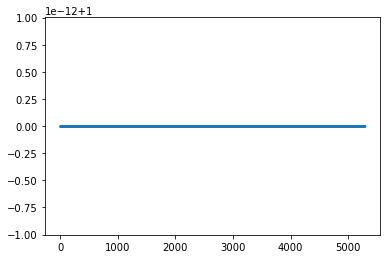

In [253]:
plt.scatter(np.arange(len(cip)),detm, s=1)

In [225]:
rotangles = np.zeros([len(cip), 3])

In [254]:
for i in range(len(cip)):
    rotangles[i,:] = rot2eul(mator2[i])

In [255]:
rotangles[0]

array([-0.32927326, -0.31676987,  0.52397856])

In [256]:
eul2rot(rotangles[0])

array([[ 0.82275715, -0.38623888, -0.41700143],
       [ 0.47543578,  0.86971621,  0.13249349],
       [ 0.31149877, -0.30726737,  0.89919702]])

In [257]:
mator2[0]

array([[ 0.82275715, -0.38623888, -0.41700143],
       [ 0.47543578,  0.86971621,  0.13249349],
       [ 0.31149877, -0.30726737,  0.89919702]])

In [258]:
df = pd.read_csv('C:/circles/finetune_test/csv/598frame.csv')

In [259]:
df

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,moment1,moment2,moment3,moment4,moment5,mom0,mom1,mom2,mom3,mom4,mom5
0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000,504089976.0,164563652.0,575078730.0,64724646.0,200929929.0,724817978.0,1.168243e+07,-2.072327e+06,-1.019244e+07,8.333248e+06,2.867905e+06,2.916994e+07
1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000,428386811.0,167247653.0,479568284.0,74638238.0,199349082.0,609253694.0,1.177674e+07,-1.249855e+06,-1.077973e+07,6.489597e+06,1.028339e+06,3.211648e+07
2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619,363275825.0,136293591.0,446703489.0,56699590.0,176090923.0,592715504.0,6.813210e+06,-2.724059e+05,-4.222803e+06,4.379176e+06,3.334522e+06,2.229237e+07
3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619,381880431.0,128225058.0,412001326.0,50659849.0,151043672.0,500506132.0,1.155030e+07,-1.867066e+06,-8.683638e+06,4.960190e+06,3.262556e+06,2.261945e+07
4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826,395257806.0,165420434.0,442680482.0,80723765.0,199558581.0,543286441.0,7.429177e+06,-2.230910e+06,-4.458354e+06,8.251103e+06,6.268502e+06,2.776715e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619,435057172.0,86812440.0,460315264.0,23001555.0,91717537.0,515400941.0,8.852938e+06,-1.746448e+05,1.059811e+07,5.247736e+06,-6.846828e+04,4.087370e+07
5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619,521235084.0,171184215.0,419739092.0,64739111.0,145262026.0,378174238.0,2.024213e+07,-2.895143e+05,-8.249394e+06,6.049184e+06,-1.224629e+06,1.255204e+07
5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619,620853856.0,102768458.0,568026943.0,23532224.0,101179273.0,588455777.0,2.424024e+07,-6.115976e+05,-1.484443e+07,5.618728e+06,1.804479e+05,1.901012e+07
5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619,661442177.0,249010683.0,530651160.0,110415531.0,211167589.0,500456320.0,3.305156e+07,1.676018e+06,-1.634760e+07,1.306456e+07,-4.131224e+06,2.430720e+07


In [260]:
rotangles.shape

(5283, 3)

In [261]:
for i in range(3):
    df.insert(20+i, "eul"+str(i), rotangles[:,i])

In [262]:
df

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,moment1,...,moment5,mom0,mom1,mom2,mom3,mom4,mom5,eul0,eul1,eul2
0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000,504089976.0,164563652.0,...,724817978.0,1.168243e+07,-2.072327e+06,-1.019244e+07,8.333248e+06,2.867905e+06,2.916994e+07,-0.329273,-0.316770,0.523979
1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000,428386811.0,167247653.0,...,609253694.0,1.177674e+07,-1.249855e+06,-1.077973e+07,6.489597e+06,1.028339e+06,3.211648e+07,0.373373,0.176038,-2.110121
2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619,363275825.0,136293591.0,...,592715504.0,6.813210e+06,-2.724059e+05,-4.222803e+06,4.379176e+06,3.334522e+06,2.229237e+07,-2.943316,-0.220348,-1.352440
3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619,381880431.0,128225058.0,...,500506132.0,1.155030e+07,-1.867066e+06,-8.683638e+06,4.960190e+06,3.262556e+06,2.261945e+07,-2.630579,-0.128256,-1.673317
4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826,395257806.0,165420434.0,...,543286441.0,7.429177e+06,-2.230910e+06,-4.458354e+06,8.251103e+06,6.268502e+06,2.776715e+07,-2.788699,-0.061995,-2.342986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619,435057172.0,86812440.0,...,515400941.0,8.852938e+06,-1.746448e+05,1.059811e+07,5.247736e+06,-6.846828e+04,4.087370e+07,0.280125,0.084930,1.273703
5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619,521235084.0,171184215.0,...,378174238.0,2.024213e+07,-2.895143e+05,-8.249394e+06,6.049184e+06,-1.224629e+06,1.255204e+07,0.925846,0.460922,-1.868335
5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619,620853856.0,102768458.0,...,588455777.0,2.424024e+07,-6.115976e+05,-1.484443e+07,5.618728e+06,1.804479e+05,1.901012e+07,-2.282067,0.176872,-1.745811
5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619,661442177.0,249010683.0,...,500456320.0,3.305156e+07,1.676018e+06,-1.634760e+07,1.306456e+07,-4.131224e+06,2.430720e+07,-0.632412,-0.711582,0.990322


In [263]:
df.to_csv('C:/circles/finetune_test/csv/598frame2.csv')

In [264]:
def getstat(img):
    if isinstance(img, t.Tensor):
        tp = (float(t.min(img)), float(t.max(img)), float(t.mean(img)), float(t.std(img)))
    elif isinstance(img, np.ndarray):
        tp = (np.min(img), np.max(img), np.mean(img), np.std(img))
    return tp

In [266]:
np.array(getstat(rotangles))

array([-3.14159265,  3.14159265, -0.31063423,  1.48487897])

In [269]:
a = df.loc[:,['eul' + str(i) for i in range(3)]].values

In [270]:
a.shape

(5283, 3)

In [9]:
with open(r'C:\cherepashkin1\circles\finetune_test\plot_output\e067\counter.txt','r') as f:
    cnt = f.readlines()[0]

In [11]:
cnt.zfill(3)

'003'

In [12]:
x=1

In [14]:
x in (1, 2) and x>0

True

# Check that rotation of all the projection matrix are the same

In [19]:
prmatw = [np.array(h5py.File(os.path.join('C:/cherepashkin1/circles/finetune_test/csv',nm), 'r').get('dataset')) for nm in
                         ['598prmat.h5']][0]

In [20]:
prmatw.shape

(5283, 36, 4, 4)

In [34]:
prmat = prmatw[0,:,:,:]

In [35]:
E = [[1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0]]

In [38]:
C = np.zeros([36,3,3])

In [54]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'C:/cherepashkin1/circles/finetune_test/')

from helpers import *

In [62]:
gamma = np.zeros([36,3])

In [76]:
for i in range(36):
    A = np.matmul(E,prmat[i,:,:].T)
#     print(A.shape)
    B = np.linalg.pinv(np.matmul(E,prmat[0,:,:].T))
    C[i,:,:] = np.matmul(A,B)
#     print(rot2eul(C[i,:,:]))
    gamma[i,:] = rot2eul(C[i,:,:])
#     with np.printoptions(precision=10, suppress=True):
# #         print(pr0[0,0,:,:])    
#         print(C[i,:,:])
#     print('_'*50)

C:/cherepashkin1/circles/finetune_test\helpers.py:401: RuntimeWarning: invalid value encountered in arcsin
  beta = -np.arcsin(R[2,0])


In [110]:
os.path.isdir('C:/cherepashkin1/')

True

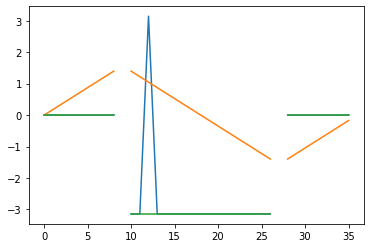

In [92]:
for i in range(3):
    plt.plot(gamma[:,i])

In [66]:
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484717/1491988_Surface.ply').points)


In [68]:
pcd.shape

(29212, 3)

In [77]:
pcd1 = np.matmul(C[9,:,:],pcd.T)

(<Figure size 720x720 with 1 Axes>, <Axes3DSubplot:>)

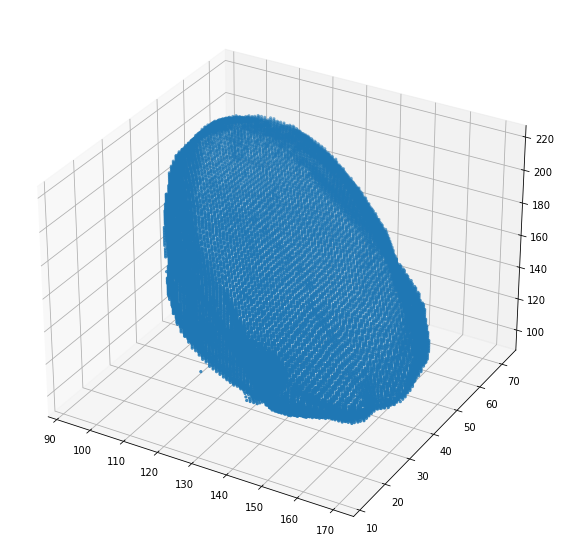

In [78]:
viewpoints([pcd])

In [83]:
pcd1.shape

(3, 29212)

(<Figure size 720x720 with 1 Axes>, <Axes3DSubplot:>)

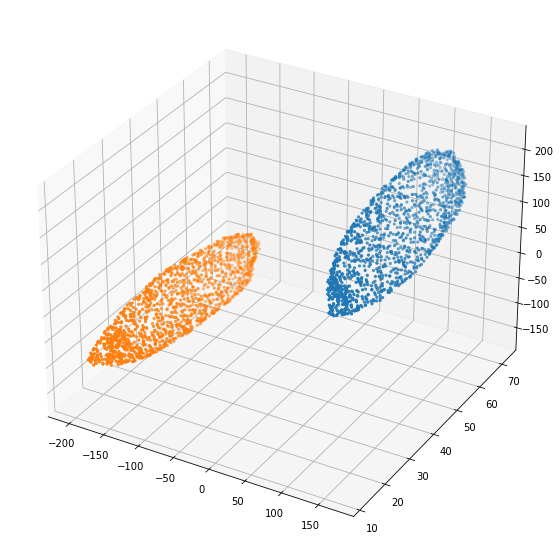

In [91]:
viewpoints([pcd[::20,:], np.matmul(C[20,:,:],pcd.T)[:,::20]])

In [22]:
pr0 = np.zeros([5283, 36, 4, 4])

In [23]:
for i in range(5283):
    for j in range(36):
        pr0[i,j,:,:] = np.matmul(prmatw[i,j, :,:],np.linalg.pinv(prmatw[0,0,:,:]))

In [29]:
pr1 = np.zeros([5283, 36, 4, 4])

In [30]:
for i in range(5283):
    for j in range(36):
        pr1[i,j,:,:] = np.matmul(np.linalg.pinv(prmatw[0,0,:,:]),prmatw[i,j, :,:])

In [27]:
with np.printoptions(precision=10, suppress=True):
    print(pr0[0,0,:,:])

[[ 1.   0.  -0.  -0. ]
 [ 0.   1.   0.   0. ]
 [ 0.  -0.   0.5  0.5]
 [ 0.  -0.   0.5  0.5]]


In [33]:
with np.printoptions(precision=10, suppress=True):
    print(prmatw[0,0,:,:])
    print(pr1[0,0,:,:])

[[    740.39063          0.             -45.703125   -182807.09      ]
 [      0.             740.39063        -27.21875     -99071.        ]
 [      0.               0.              -0.05078125    -121.        ]
 [      0.               0.              -0.05078125    -121.        ]]
[[ 0.9982486951 -0.0008107598  0.041804069  -0.0000175443]
 [-0.0008107598  0.9996246619  0.0193530312 -0.0000081221]
 [ 0.041804069   0.0193530312  0.0021268187  0.0004187872]
 [-0.0000175443 -0.0000081221  0.0004187872  0.9999998242]]


In [32]:
prmatw[0,0,:,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8280709e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.9071000e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [95]:
C2 = np.zeros([5283,36,3,3])

In [96]:
for j in range(5283):
    for i in range(36):
        A = np.matmul(E,prmatw[j,i,:,:].T)
    #     print(A.shape)
        B = np.linalg.pinv(np.matmul(E,prmatw[j,0,:,:].T))
        C2[j, i,:,:] = np.matmul(A,B)
    #     print(rot2eul(C[i,:,:]))
#         gamma[i,:] = rot2eul(C[i,:,:])
#     with np.printoptions(precision=10, suppress=True):
# #         print(pr0[0,0,:,:])    
#         print(C[i,:,:])
#     print('_'*50)

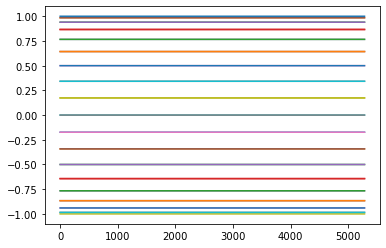

In [108]:
for i in range(36):
    plt.plot(C2[:,i,2,2])

In [111]:
C[10,:,:]

array([[-1.73648185e-01,  8.75213714e-10,  9.84807739e-01],
       [-8.53414248e-17,  1.00000000e+00,  2.90752252e-15],
       [-9.84807769e-01, -2.26906289e-11, -1.73648173e-01]])

In [112]:
df = pd.read_csv('C:/cherepashkin1/circles/finetune_test/csv/598frame.csv')

In [113]:
df

,Unnamed: 0,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,...,moment5,mom0,mom1,mom2,mom3,mom4,mom5,eul0,eul1,eul2
0,0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000,504089976.0,...,724817978.0,1.168243e+07,-2.072327e+06,-1.019244e+07,8.333248e+06,2.867905e+06,2.916994e+07,-0.329273,-0.316770,0.523979
1,1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000,428386811.0,...,609253694.0,1.177674e+07,-1.249855e+06,-1.077973e+07,6.489597e+06,1.028339e+06,3.211648e+07,0.373373,0.176038,-2.110121
2,2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619,363275825.0,...,592715504.0,6.813210e+06,-2.724059e+05,-4.222803e+06,4.379176e+06,3.334522e+06,2.229237e+07,-2.943316,-0.220348,-1.352440
3,3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619,381880431.0,...,500506132.0,1.155030e+07,-1.867066e+06,-8.683638e+06,4.960190e+06,3.262556e+06,2.261945e+07,-2.630579,-0.128256,-1.673317
4,4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826,395257806.0,...,543286441.0,7.429177e+06,-2.230910e+06,-4.458354e+06,8.251103e+06,6.268502e+06,2.776715e+07,-2.788699,-0.061995,-2.342986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619,435057172.0,...,515400941.0,8.852938e+06,-1.746448e+05,1.059811e+07,5.247736e+06,-6.846828e+04,4.087370e+07,0.280125,0.084930,1.273703
5279,5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619,521235084.0,...,378174238.0,2.024213e+07,-2.895143e+05,-8.249394e+06,6.049184e+06,-1.224629e+06,1.255204e+07,0.925846,0.460922,-1.868335
5280,5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619,620853856.0,...,588455777.0,2.424024e+07,-6.115976e+05,-1.484443e+07,5.618728e+06,1.804479e+05,1.901012e+07,-2.282067,0.176872,-1.745811
5281,5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619,661442177.0,...,500456320.0,3.305156e+07,1.676018e+06,-1.634760e+07,1.306456e+07,-4.131224e+06,2.430720e+07,-0.632412,-0.711582,0.990322


In [114]:
a = df.loc[:,['mom' + str(i) for i in range(6)]].values

In [117]:
orient = np.zeros([5283,3,3])

In [118]:
for i in range(5283):
    _, orient[i,:,:] = LA.eig(pose6tomat(a[i,:]))

In [119]:
orient[0].

array([[ 0.41700143, -0.82275715,  0.38623888],
       [-0.13249349, -0.47543578, -0.86971621],
       [-0.89919702, -0.31149877,  0.30726737]])

In [120]:
orient2 = orient.reshape([5283,9])

In [121]:
orient2[0]

array([ 0.41700143, -0.82275715,  0.38623888, -0.13249349, -0.47543578,
       -0.86971621, -0.89919702, -0.31149877,  0.30726737])

In [122]:
orient2.shape

(5283, 9)

In [124]:
df

,Unnamed: 0,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,...,eul2,orient0,orient1,orient2,orient3,orient4,orient5,orient6,orient7,orient8
0,0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000,504089976.0,...,0.523979,0.417001,-0.822757,0.386239,-0.132493,-0.475436,-0.869716,-0.899197,-0.311499,0.307267
1,1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000,428386811.0,...,-2.110121,-0.396725,0.766132,-0.505620,0.047406,-0.532986,-0.844795,0.916712,0.359121,-0.175130
2,2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619,363275825.0,...,-1.352440,0.238723,-0.947801,0.211387,-0.166528,-0.254412,-0.952650,-0.956703,-0.192217,0.218569
3,3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619,381880431.0,...,-1.673317,0.475076,-0.874071,-0.101501,-0.161030,0.027042,-0.986579,-0.865085,-0.485045,0.127905
4,4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826,395257806.0,...,-2.342986,-0.207030,0.696365,0.687178,0.282786,0.715009,-0.639371,0.936574,-0.061955,0.344950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619,435057172.0,...,1.273703,-0.288228,0.912054,0.291687,0.002986,-0.303757,0.952745,-0.957557,-0.275479,-0.084828
5279,5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619,521235084.0,...,-1.868335,-0.842404,0.470543,-0.262574,-0.021352,-0.516056,-0.856289,0.538423,0.715735,-0.444775
5280,5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619,620853856.0,...,-1.745811,0.765961,-0.619616,-0.171406,-0.018797,0.244920,-0.969361,-0.642613,-0.745714,-0.175952
5281,5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619,661442177.0,...,0.990322,-0.783147,-0.462793,0.415335,-0.116293,0.765135,0.633281,0.610865,-0.447652,0.653033


In [ ]:
a = df.loc[:,['mom' + str(i) for i in range(6)]].values
orient = np.zeros([5283,3,3])
for i in range(5283):
    _, orient[i,:,:] = LA.eig(pose6tomat(a[i,:]))
for i in range(9):
    df.insert(24+i, "orient"+str(i), orient2[:,i])

In [144]:
df.to_csv('C:/cherepashkin1/circles/finetune_test/csv/598frame.csv')

In [126]:
orient.shape

(5283, 3, 3)

In [145]:
df

,Unnamed: 0,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,...,eul2,orient0,orient1,orient2,orient3,orient4,orient5,orient6,orient7,orient8
0,0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000,504089976.0,...,0.523979,0.417001,-0.822757,0.386239,-0.132493,-0.475436,-0.869716,-0.899197,-0.311499,0.307267
1,1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000,428386811.0,...,-2.110121,-0.396725,0.766132,-0.505620,0.047406,-0.532986,-0.844795,0.916712,0.359121,-0.175130
2,2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619,363275825.0,...,-1.352440,0.238723,-0.947801,0.211387,-0.166528,-0.254412,-0.952650,-0.956703,-0.192217,0.218569
3,3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619,381880431.0,...,-1.673317,0.475076,-0.874071,-0.101501,-0.161030,0.027042,-0.986579,-0.865085,-0.485045,0.127905
4,4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826,395257806.0,...,-2.342986,-0.207030,0.696365,0.687178,0.282786,0.715009,-0.639371,0.936574,-0.061955,0.344950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619,435057172.0,...,1.273703,-0.288228,0.912054,0.291687,0.002986,-0.303757,0.952745,-0.957557,-0.275479,-0.084828
5279,5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619,521235084.0,...,-1.868335,-0.842404,0.470543,-0.262574,-0.021352,-0.516056,-0.856289,0.538423,0.715735,-0.444775
5280,5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619,620853856.0,...,-1.745811,0.765961,-0.619616,-0.171406,-0.018797,0.244920,-0.969361,-0.642613,-0.745714,-0.175952
5281,5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619,661442177.0,...,0.990322,-0.783147,-0.462793,0.415335,-0.116293,0.765135,0.633281,0.610865,-0.447652,0.653033


In [127]:
C2.shape

(5283, 36, 3, 3)

In [128]:
C.shape

(36, 3, 3)

In [131]:
GTws = np.einsum('ijk,nkm->nijm', C, orient)

In [132]:
GTws.shape

(5283, 36, 3, 3)

In [137]:
GTws[10,5,:,:]

array([[ 0.85704497,  0.51494706,  0.01742065],
       [ 0.05027015, -0.04992144, -0.99748722],
       [ 0.5127835 , -0.85576708,  0.06867139]])

In [135]:
np.matmul(C[5,:,:], orient[10,:,:])

array([[ 0.85704497,  0.51494706,  0.01742065],
       [ 0.05027015, -0.04992144, -0.99748722],
       [ 0.5127835 , -0.85576708,  0.06867139]])

In [139]:
a, b, c = (None,)*3

In [143]:
print(b)

None


In [141]:
b

In [147]:
df2 = pd.DataFrame(columns=df.columns)

In [148]:
df2

,Unnamed: 0,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,...,eul2,orient0,orient1,orient2,orient3,orient4,orient5,orient6,orient7,orient8


In [146]:
list(df.columns)

['Unnamed: 0',
 'index',
 'file_name',
 'zero_angle',
 'x_cms',
 'y_cms',
 'z_cms',
 'delta_x',
 'delta_y',
 'moment0',
 'moment1',
 'moment2',
 'moment3',
 'moment4',
 'moment5',
 'mom0',
 'mom1',
 'mom2',
 'mom3',
 'mom4',
 'mom5',
 'eul0',
 'eul1',
 'eul2',
 'orient0',
 'orient1',
 'orient2',
 'orient3',
 'orient4',
 'orient5',
 'orient6',
 'orient7',
 'orient8']

In [1]:
lst = [[0, 120, 240], [0, 120, 240], [0, 120, 240]] 

In [ ]:
for i in lst:
    

In [2]:
flat_list = [item for sublist in lst for item in sublist]

In [3]:
flat_list

[0, 120, 240, 0, 120, 240, 0, 120, 240]

In [6]:
GTw = np.zeros([5000, 36, 3])

In [7]:
GT0 = GTw[[0,1], [2,3], :]

In [8]:
GT0

array([[0., 0., 0.],
       [0., 0., 0.]])

In [9]:
a = t.zeros([5])

In [13]:
a = a.cuda()

In [14]:
a.is_cuda

True

In [15]:
np.min(GTw,axis=(0,1))

array([0., 0., 0.])

In [16]:
GTw2 = GTw - np.min(GTw,axis=(0,1))

In [17]:
GTw2.shape

(5000, 36, 3)

In [25]:
GTw.shape

(5000, 36, 3)

In [24]:
np.transpose(GTw, (5000, 3, 36)).shape

AxisError: axis 5000 is out of bounds for array of dimension 3

In [27]:
b - np.min(GTw,axis=(0,1))

ValueError: operands could not be broadcast together with shapes (5000,3,36) (3,) 

In [ ]:
gstat = np.array([np.min(GTw,axis=0), np.max(GTw,axis=0),
                              np.mean(GTw,axis=0), np.std(GTw,axis=0)])

In [26]:
b = np.zeros([5000, 3, 36])

In [ ]:
b - 